In [370]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [371]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Preprocessing Part 1

In [372]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

mainroad            2
guestroom           2
basement            2
hotwaterheating     2
airconditioning     2
prefarea            2
furnishingstatus    3
dtype: int64

In [373]:
df.shape

(545, 13)

In [374]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [375]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [376]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [377]:
df.groupby('furnishingstatus')['furnishingstatus'].agg('count')

furnishingstatus
furnished         140
semi-furnished    227
unfurnished       178
Name: furnishingstatus, dtype: int64

In [378]:
df['bathrooms'].unique()

array([2, 4, 1, 3], dtype=int64)

In [379]:
#No use of Bathroom more than Bedrooms
df1=df[df.bathrooms<df.bedrooms]

In [380]:
df1.shape

(530, 13)

In [381]:
print(df.shape)
print(df.duplicated().sum())
tabela = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Types':df.dtypes.values
})
display(tabela)

(545, 13)
0


,Unique,Null,NullPercent,Types
price,219,0,0.0,int64
area,284,0,0.0,int64
bedrooms,6,0,0.0,int64
bathrooms,4,0,0.0,int64
stories,4,0,0.0,int64
mainroad,2,0,0.0,object
guestroom,2,0,0.0,object
basement,2,0,0.0,object
hotwaterheating,2,0,0.0,object
airconditioning,2,0,0.0,object


In [382]:
#creating new featur which can be help full for outliers
df['price_per_area']=df['price']/df1['area']
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_area
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1792.452830
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,NaN
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1229.919679
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1537.735849


# Exploratory Data Analysis

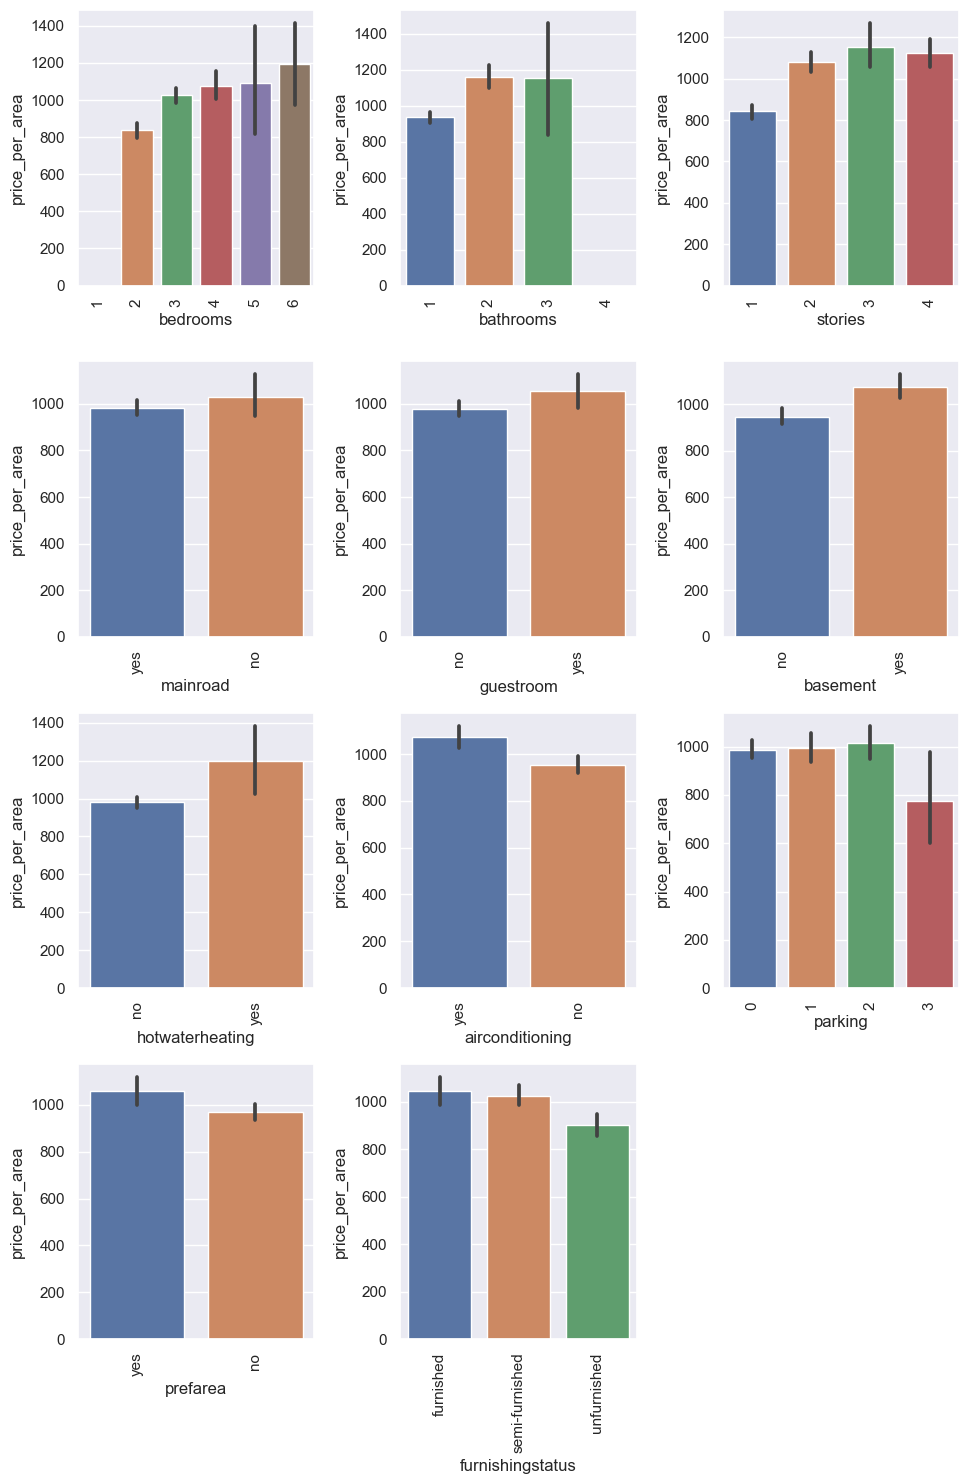

In [383]:
# list of categorical variables to plot
cat_vars = ['bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea', 'furnishingstatus']

# create figure with subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 15))
axs = axs.ravel()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price_per_area', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[11])


# show plot
plt.show()

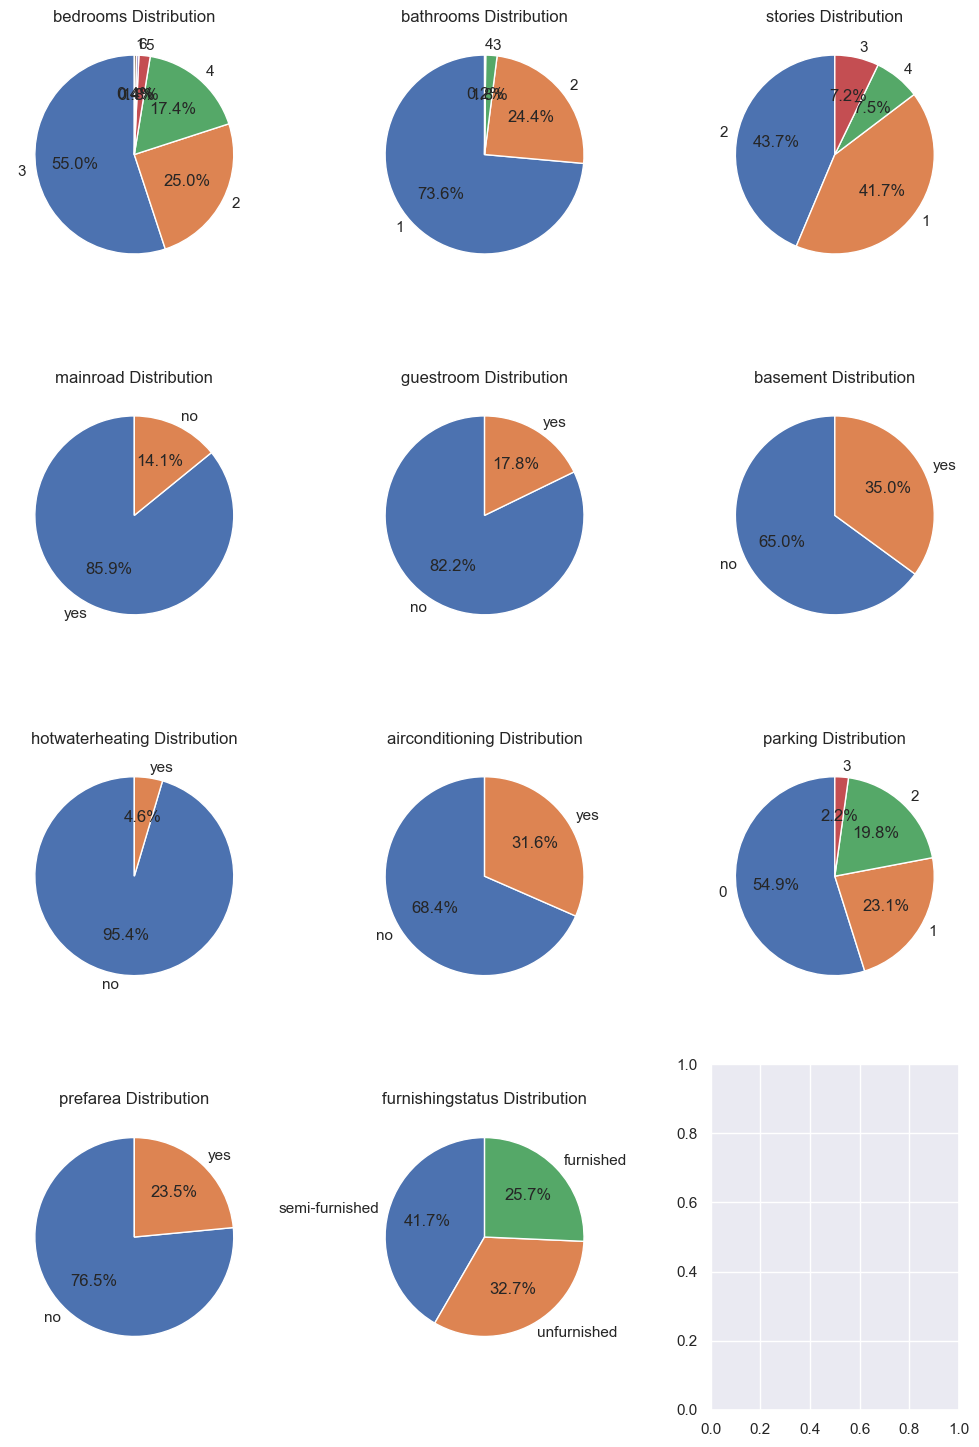

In [384]:
cat_vars = ['bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea', 'furnishingstatus']

# create a figure and axes
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# remove the 11 subplot
# fig.delaxes(axs[10])

# show the plot
plt.show()

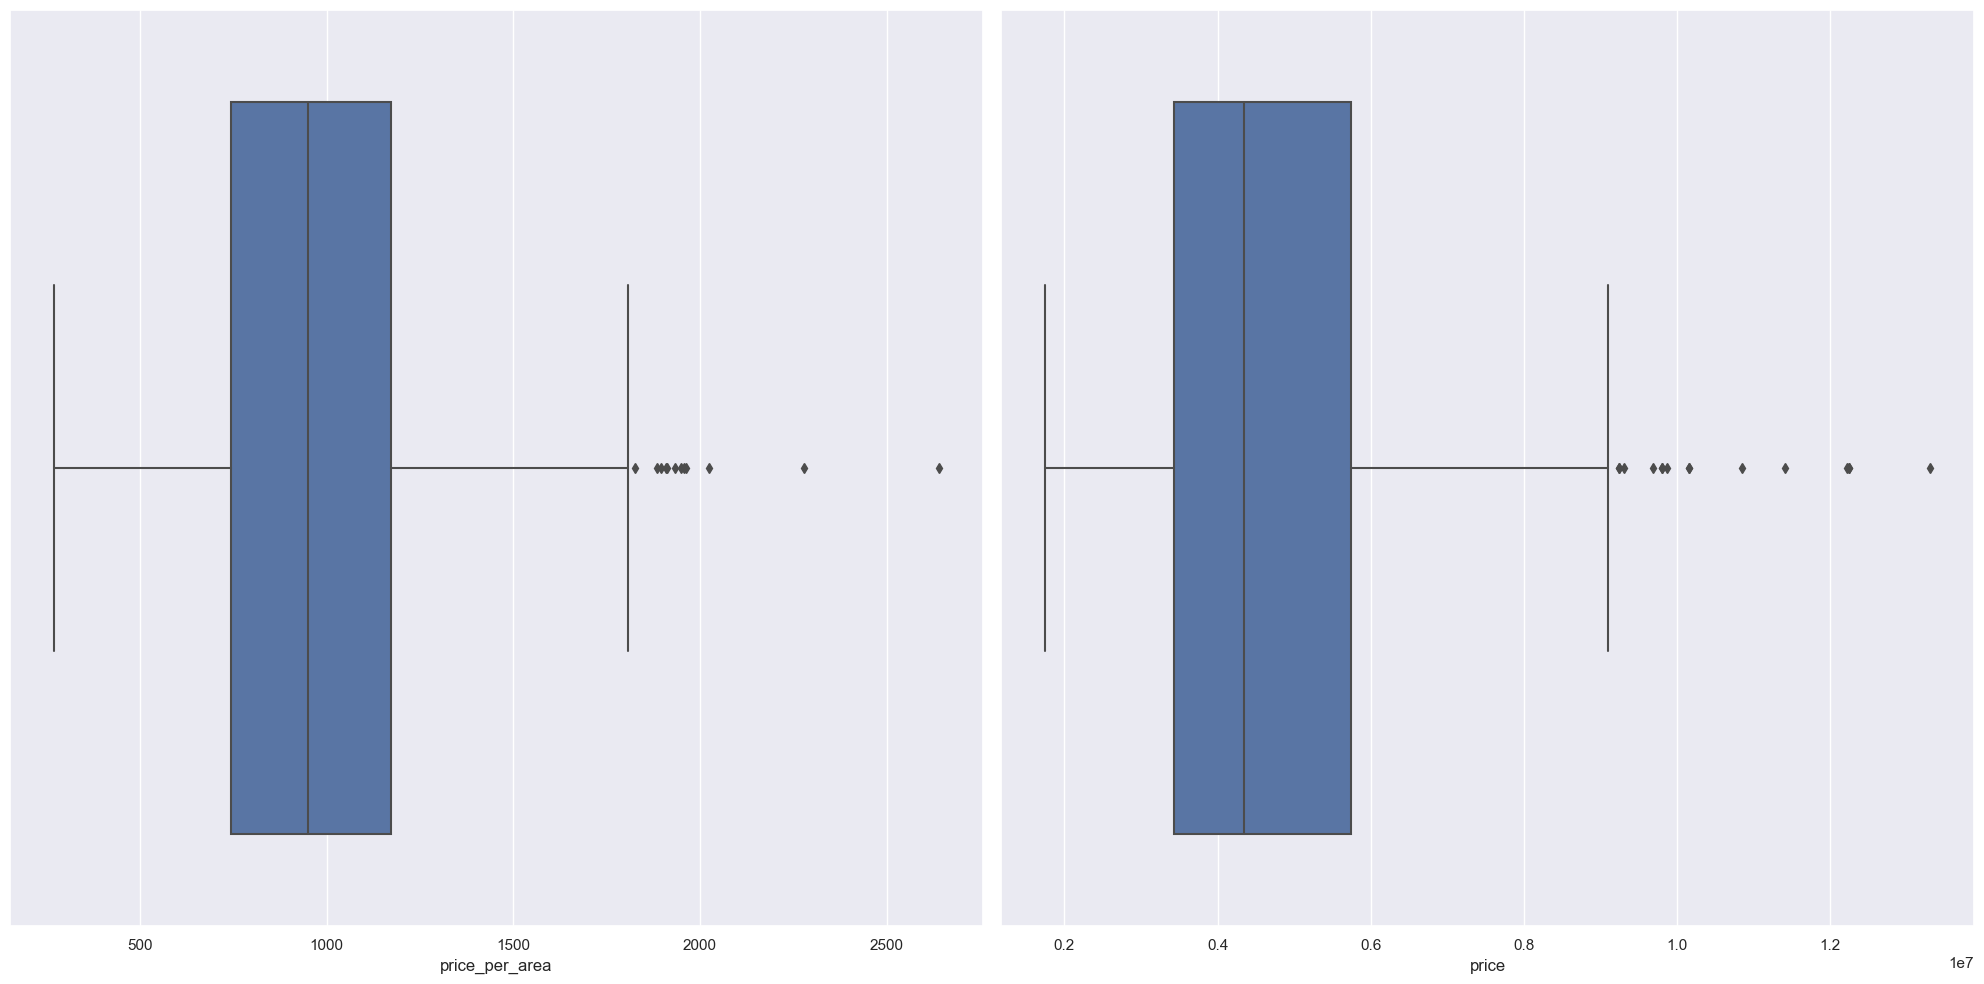

In [385]:
num=['price_per_area','price']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()
for i,var in enumerate(num):
    sns.boxplot(x=var,data=df,ax=axs[i])
fig.tight_layout()
plt.show()

In [386]:
# df=df[df.price_per_area<1760]

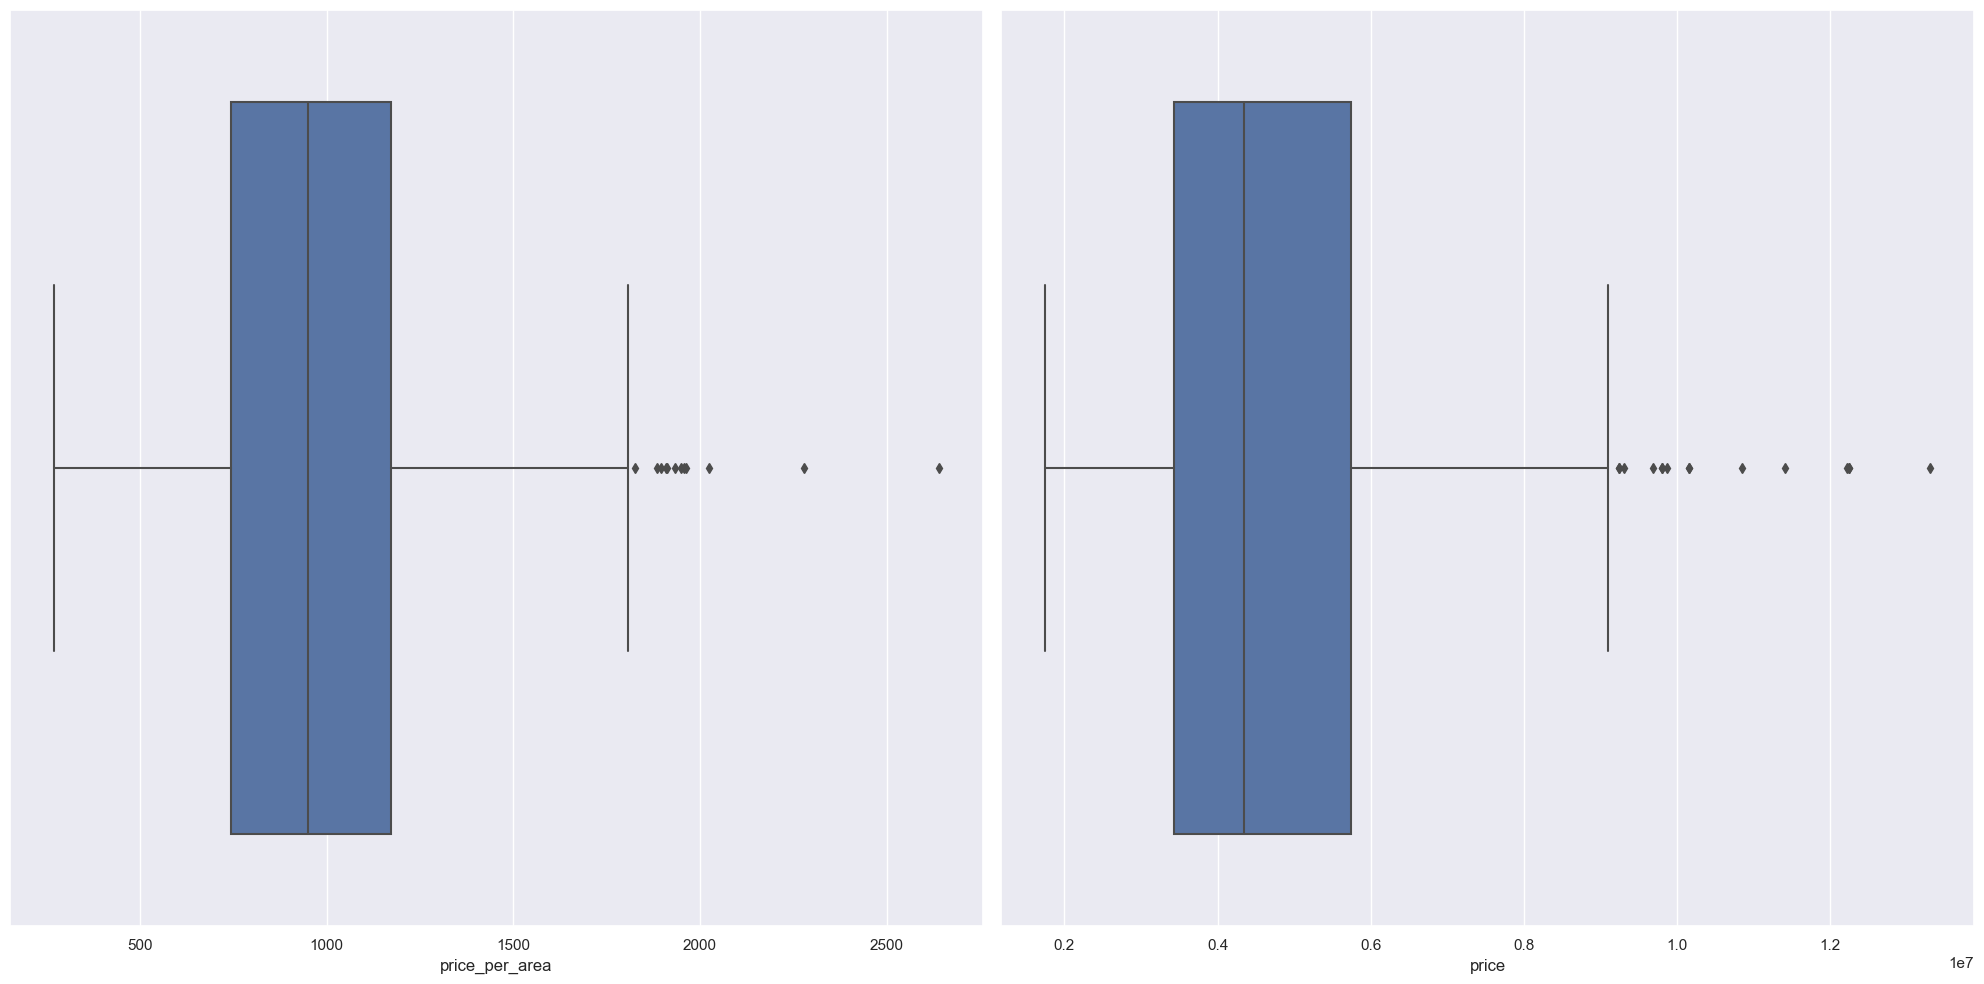

In [359]:
num=['price_per_area','price']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()
for i,var in enumerate(num):
    sns.boxplot(x=var,data=df,ax=axs[i])
fig.tight_layout()
plt.show()

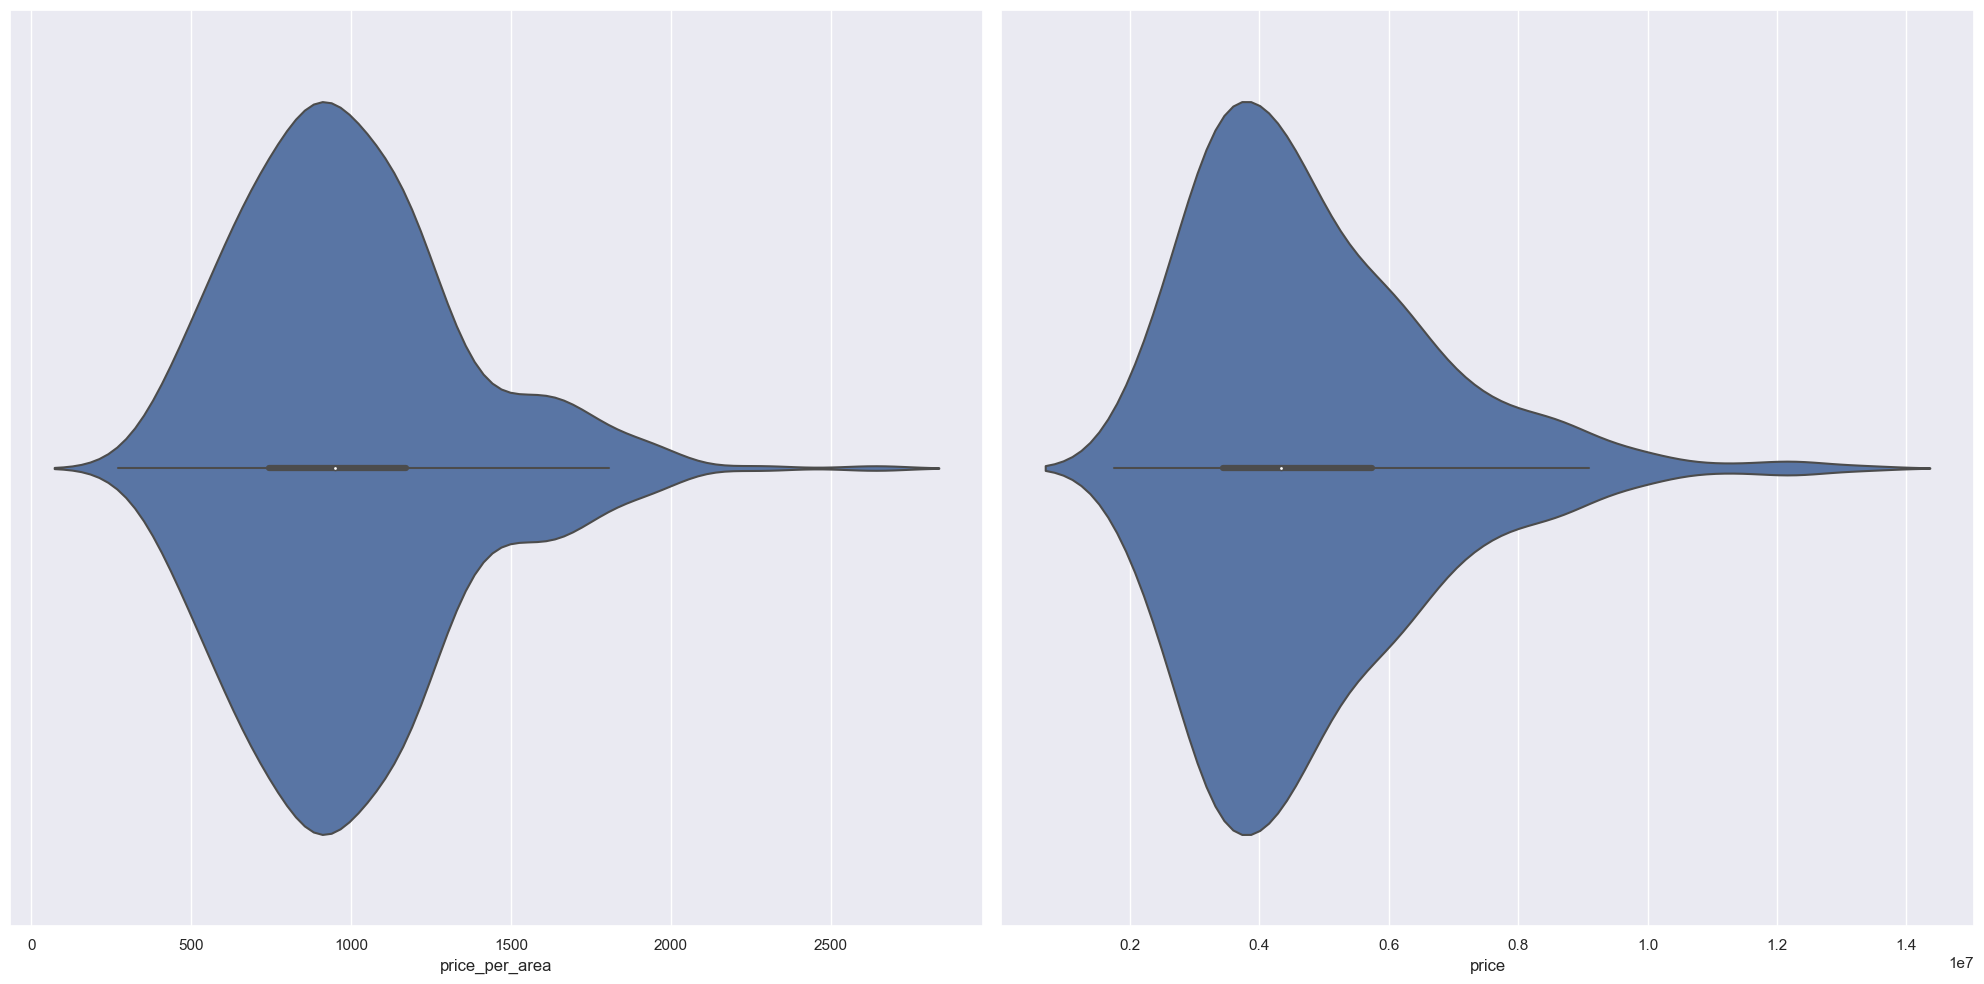

In [387]:
num=['price_per_area','price']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()
for i,var in enumerate(num):
    sns.violinplot(x=var,data=df,ax=axs[i])
fig.tight_layout()
plt.show()

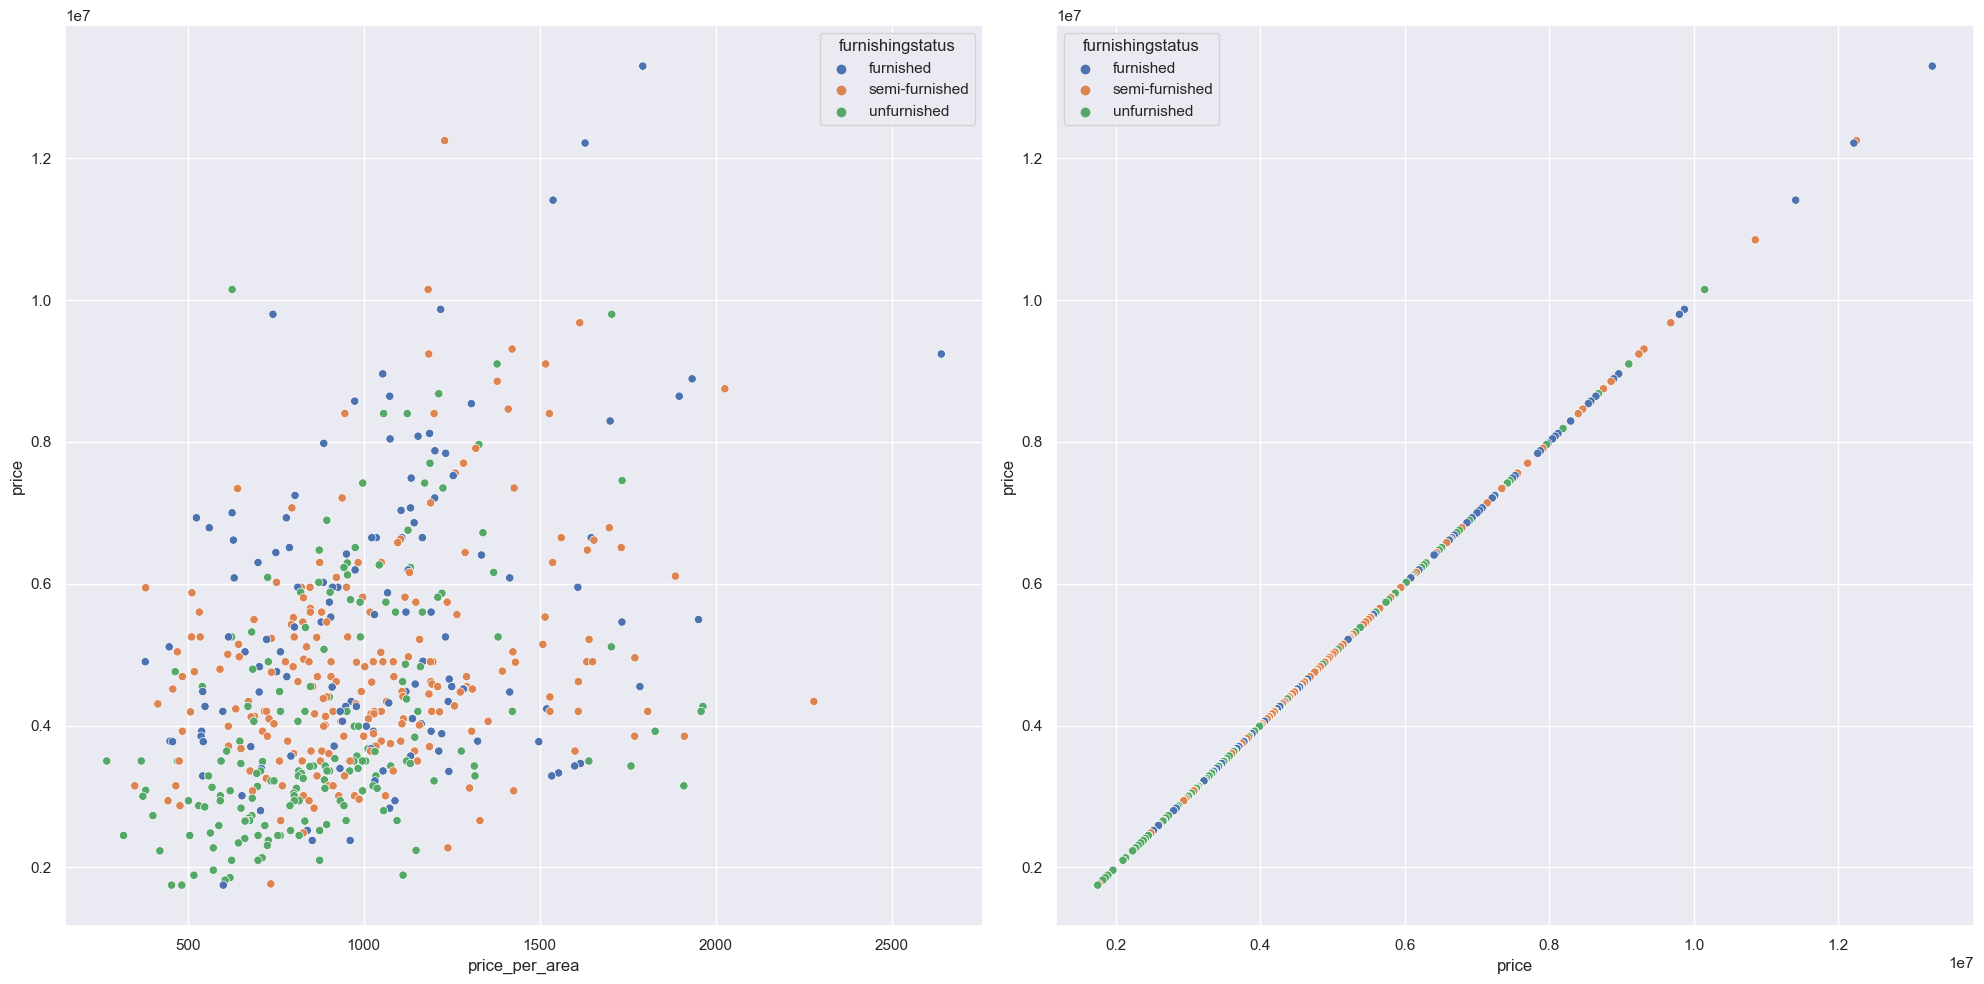

In [388]:
num=['price_per_area','price']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()
for i,var in enumerate(num):
    sns.scatterplot(x=var,y='price',hue='furnishingstatus',data=df,ax=axs[i])
fig.tight_layout()
plt.show()

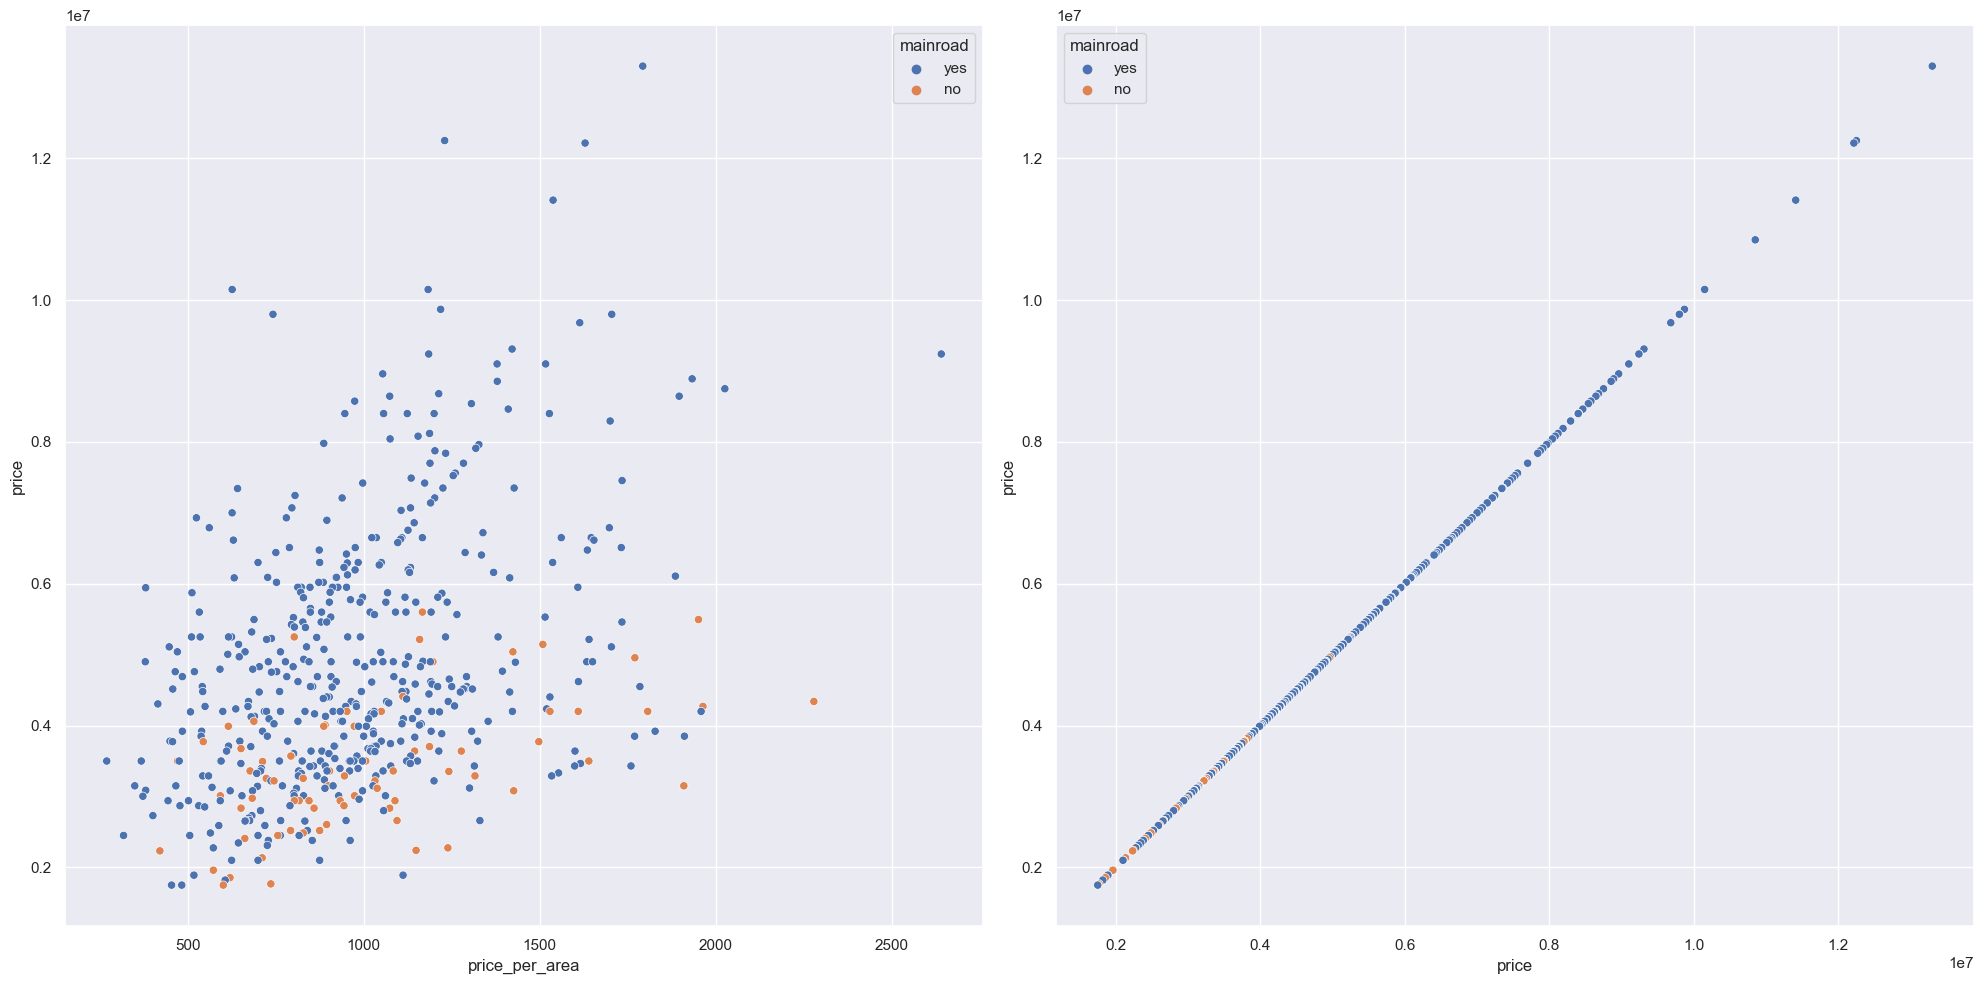

In [389]:
num=['price_per_area','price']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()
for i,var in enumerate(num):
    sns.scatterplot(x=var,y='price',hue='mainroad',data=df,ax=axs[i])
fig.tight_layout()
plt.show()

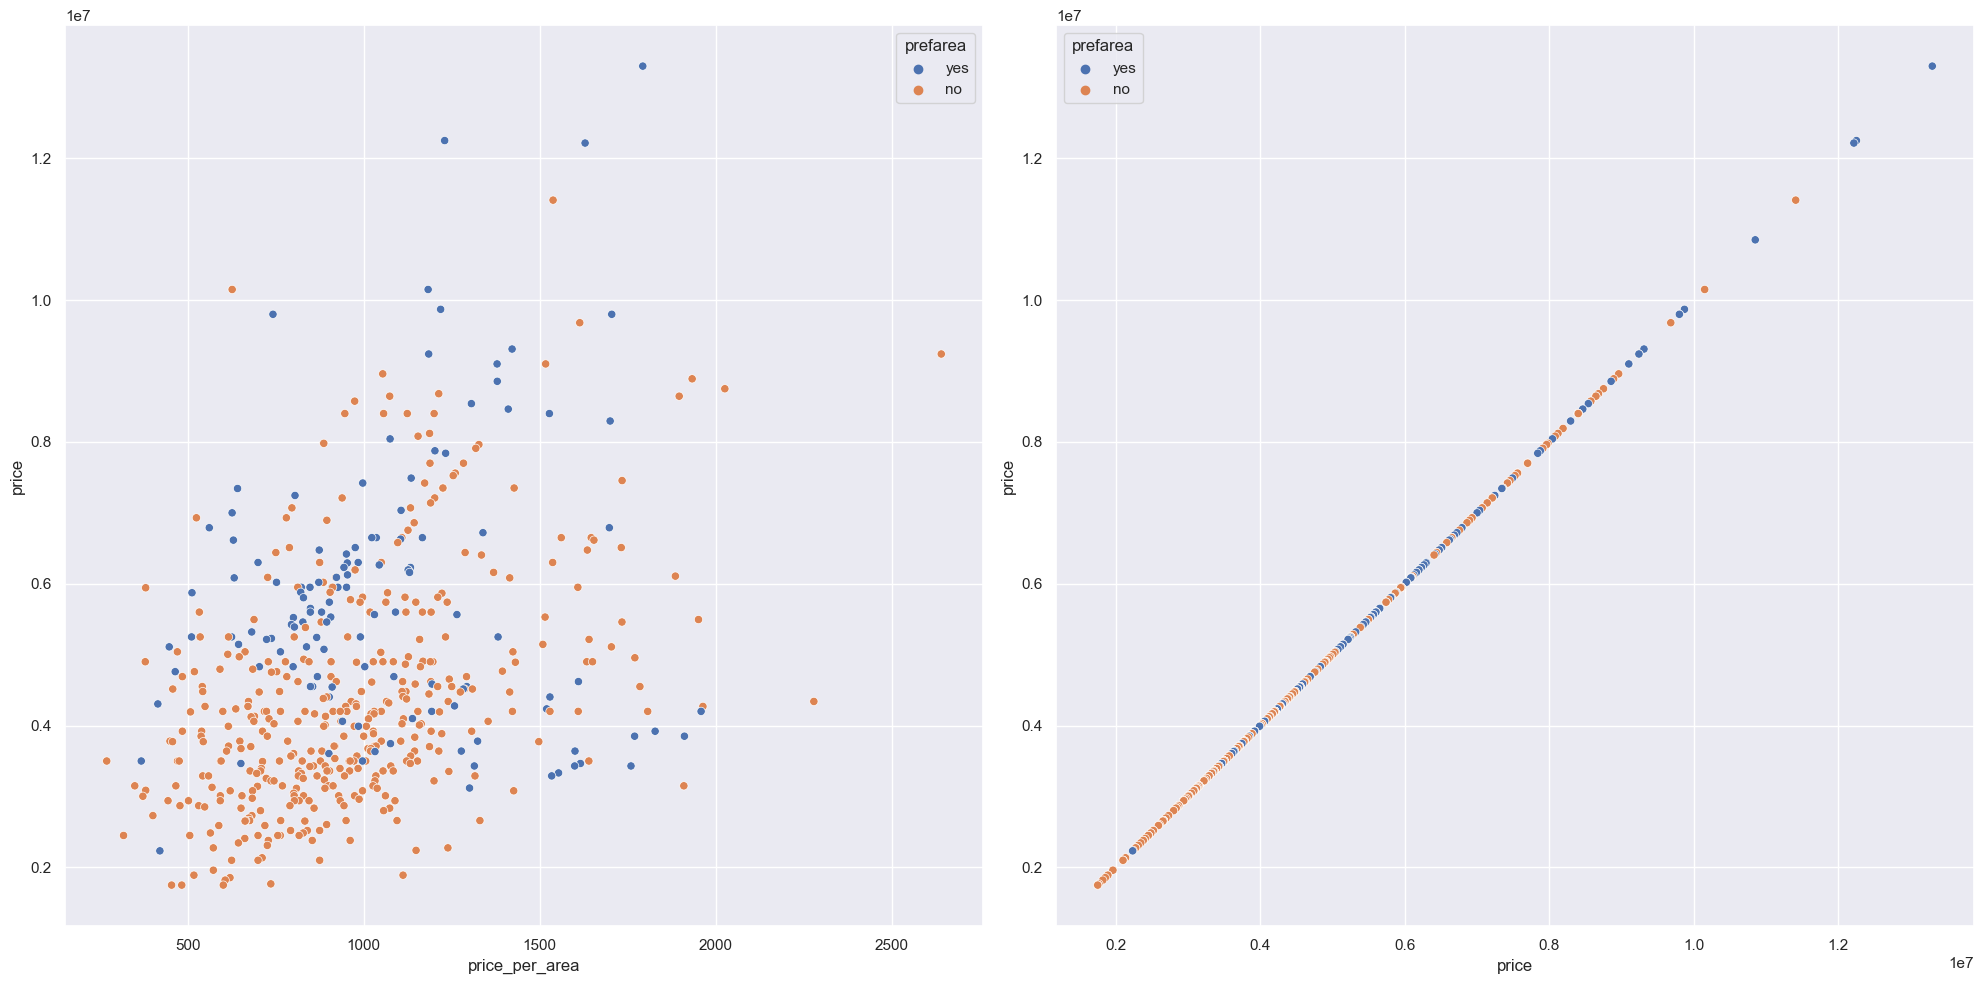

In [390]:
num=['price_per_area','price']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()
for i,var in enumerate(num):
    sns.scatterplot(x=var,y='price',hue='prefarea',data=df,ax=axs[i])
fig.tight_layout()
plt.show()

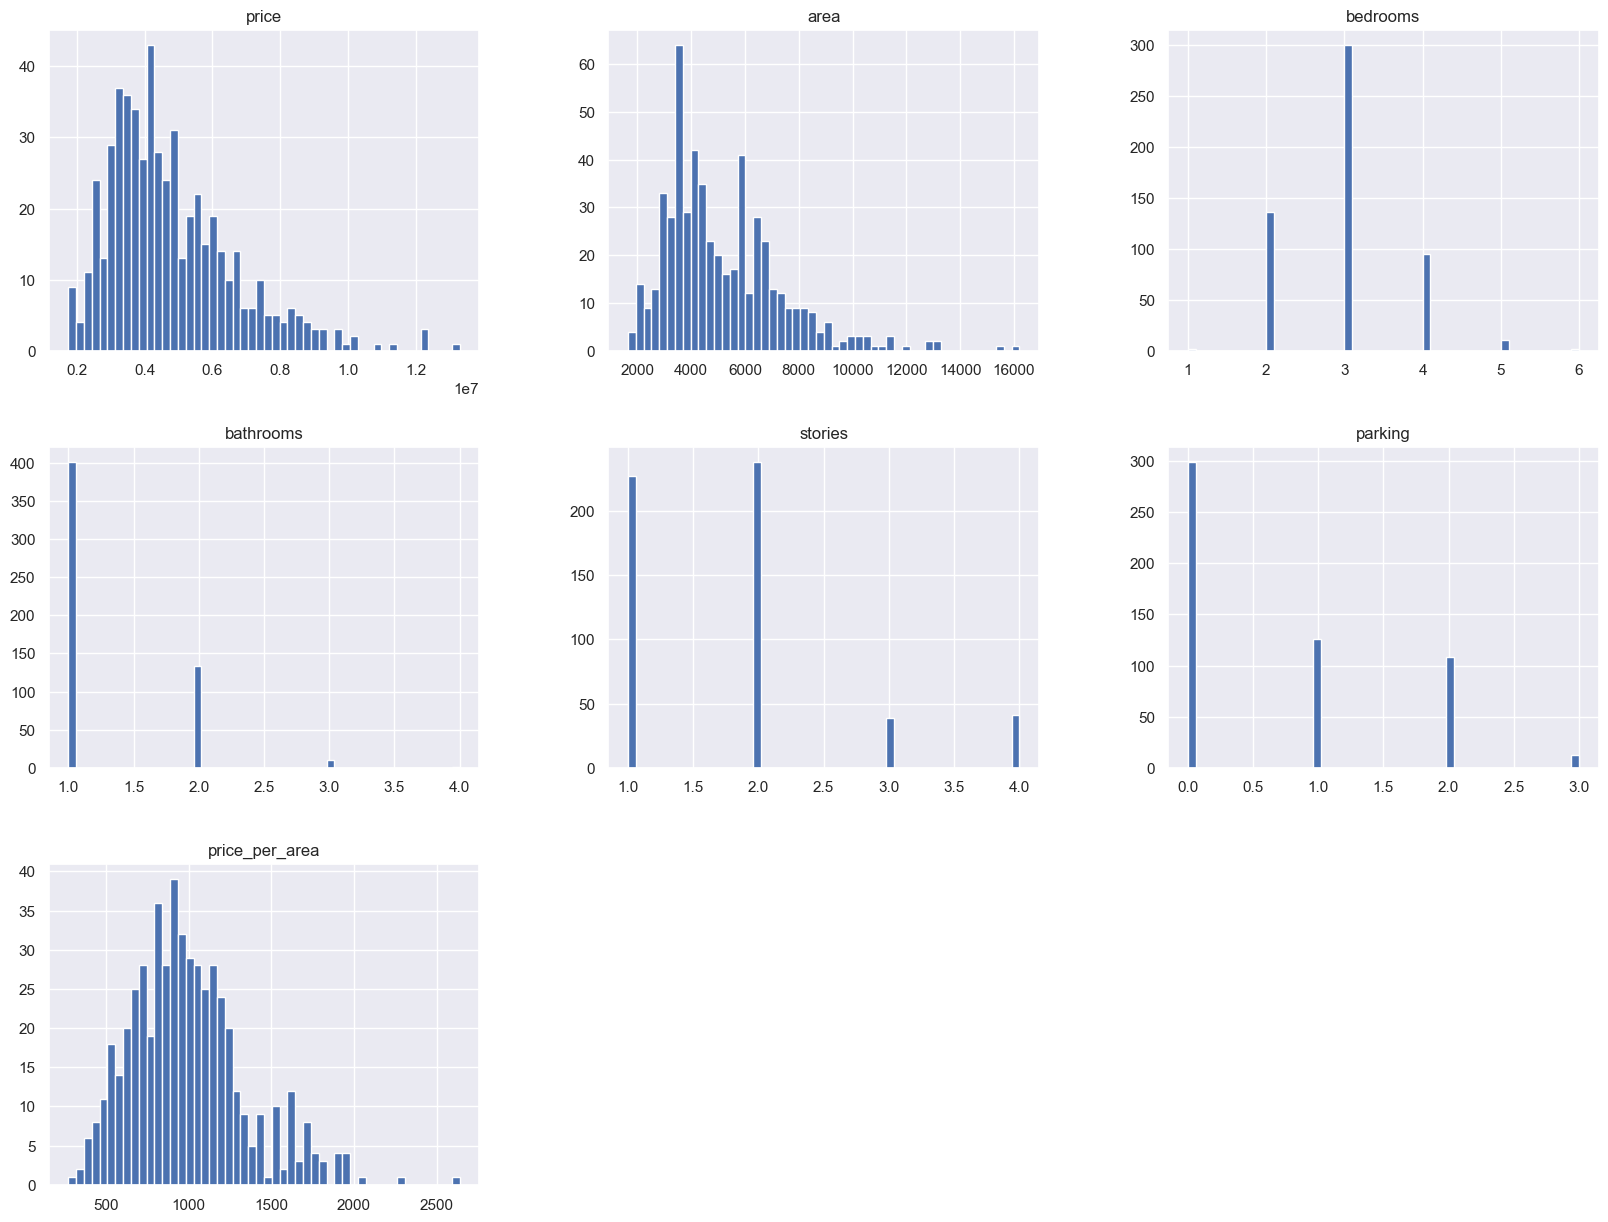

In [391]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [392]:
print(df.shape)
print(df.duplicated().sum())
tabela = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Types':df.dtypes.values
})
display(tabela)

(545, 14)
0


,Unique,Null,NullPercent,Types
price,219,0,0.000000,int64
area,284,0,0.000000,int64
bedrooms,6,0,0.000000,int64
bathrooms,4,0,0.000000,int64
stories,4,0,0.000000,int64
mainroad,2,0,0.000000,object
guestroom,2,0,0.000000,object
basement,2,0,0.000000,object
hotwaterheating,2,0,0.000000,object
airconditioning,2,0,0.000000,object


In [393]:
df.isnull().sum()

price                0
area                 0
bedrooms             0
bathrooms            0
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
furnishingstatus     0
price_per_area      15
dtype: int64

In [395]:
df=pd.get_dummies(df,drop_first=True)
df.shape

(545, 15)

In [396]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,price_per_area,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1792.452830,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,NaN,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1229.919679,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1628.666667,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1537.735849,1,1,1,0,1,0,0,0


In [398]:
from sklearn.impute import SimpleImputer
# Create an instance of the SimpleImputer class with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the DataFrame
imputer.fit(df)

# Transform the DataFrame
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

# The DataFrame 'df_imputed' now contains the imputed values with mean
df.head()

,price,area,bedrooms,bathrooms,stories,parking,price_per_area,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000.0,7420.0,4.0,2.0,3.0,2.0,1792.452830,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12250000.0,8960.0,4.0,4.0,4.0,3.0,990.651154,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12250000.0,9960.0,3.0,2.0,2.0,2.0,1229.919679,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,12215000.0,7500.0,4.0,2.0,2.0,3.0,1628.666667,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000.0,7420.0,4.0,1.0,2.0,2.0,1537.735849,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [403]:
# #converting one column
# df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished':2,'semi-furnished': 1, 'unfurnished': 0})
# df.head()


# Correlation Heatmap

<AxesSubplot:>

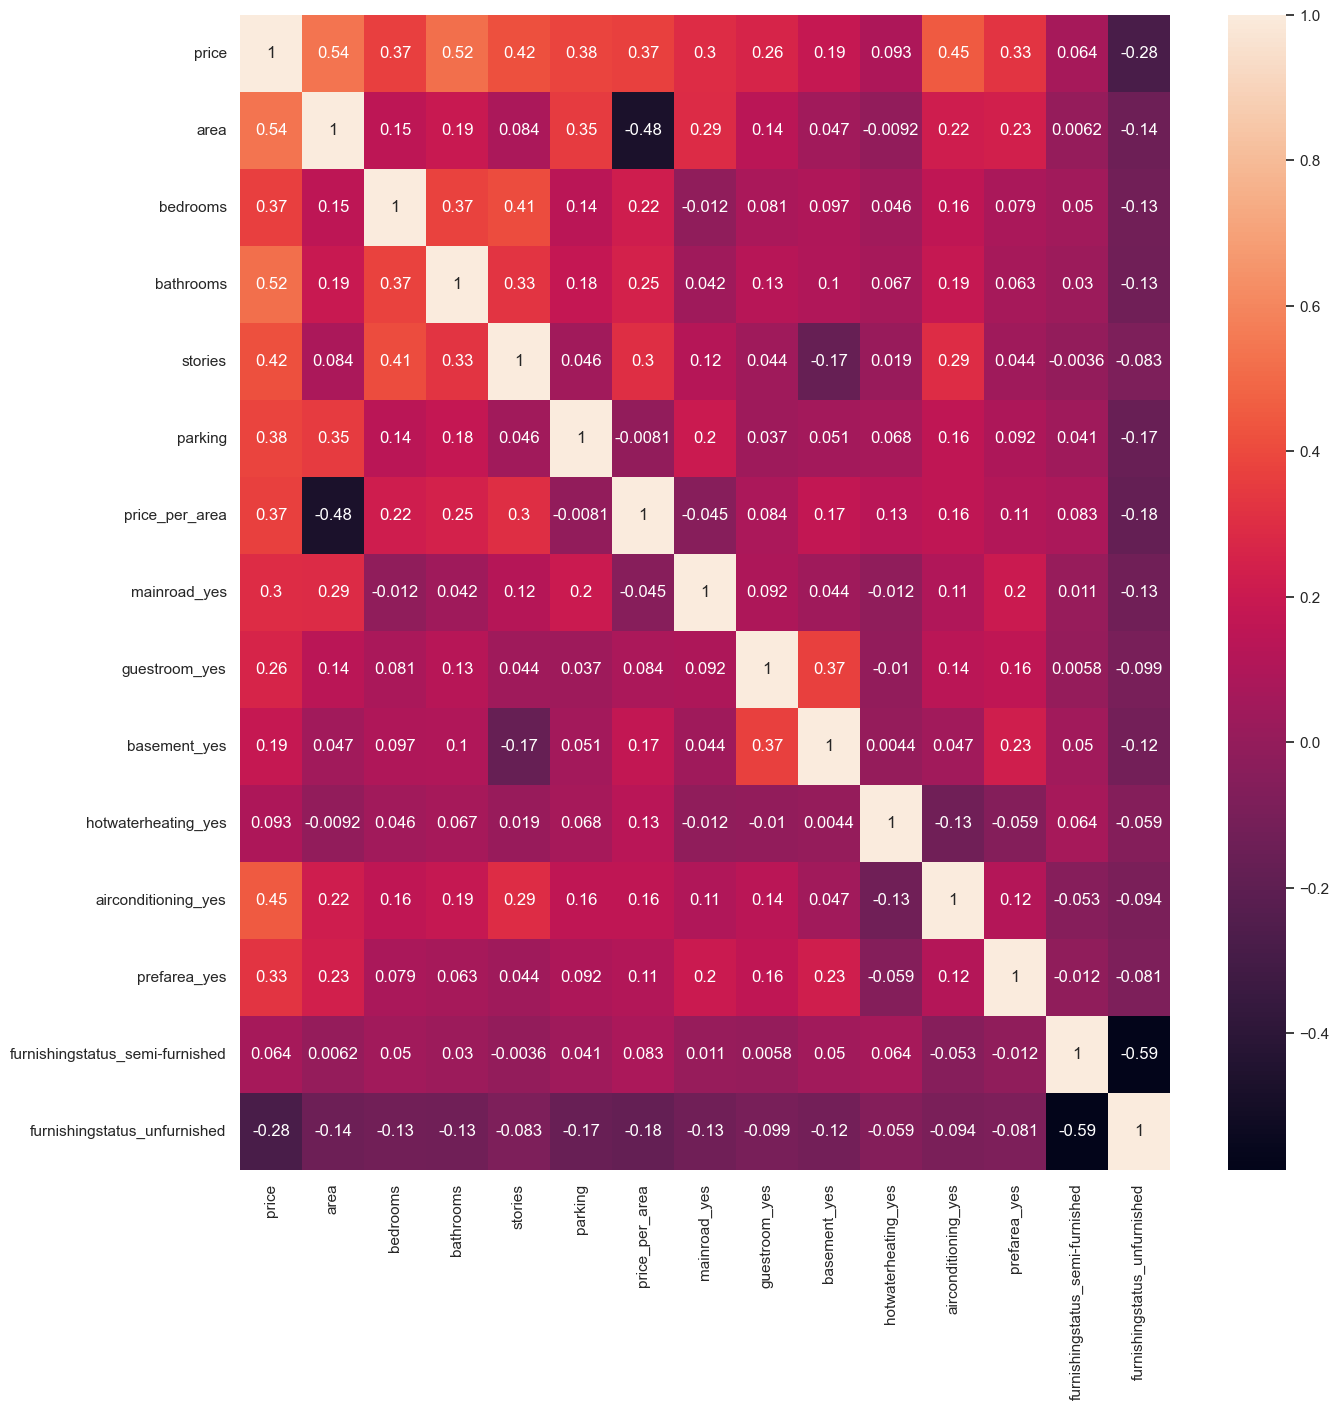

In [400]:
#correlation Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

# Train Test Split

In [404]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


In [405]:
X=df.drop('price',axis =1)
y=df['price']

In [406]:
#Perform train-test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [407]:
df.isnull().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
price_per_area                     0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [410]:
#Concatenate X_train and y_train for Outlier removal
train_df=pd.concat([X_train,y_train],axis=1)

#Calculate the IQR values for Each
Q1=train_df.quantile(0.25)
Q3=train_df.quantile(0.75)
IQR=Q3 -Q1

#Remove outliers from X_train
train_df=train_df[~((train_df<(Q1 -1.5*IQR)) | (train_df>(Q3 +1.5*IQR))).any(axis=1)]

#Seprate X_train and y_train after outlier removal
X_train=train_df.drop('price',axis=1)
y_train=train_df['price']

# Linear Regression

In [426]:
# Create an instance of the LinearRegression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 766042765080.4442
Root Mean Squared Error (RMSE): 875238.6903470643
R-squared (R2): 0.8221149153965147


# Decision Tree Regressor

In [414]:
#Create a DecisionTreeRegressor object
dt=DecisionTreeRegressor()
# Define the hyperparameter to tune and their values
pg={'max_depth':[2,4,6,8],'min_samples_split':[2,4,6,8],'min_samples_leaf':[1,2,3,4],'max_features':['auto','sqrt','log2'],'random_state':[0,42]}
# Create a GridSearchCV object
gs= GridSearchCV(dt,pg,cv=5,scoring='neg_mean_squared_error')
#Fit the GridSearchCV object to the Data
gs.fit(X_train,y_train)

#Print the best HyperParameters
print(gs.best_params_)


{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [417]:
dt=DecisionTreeRegressor(random_state=0,max_depth=8,max_features='auto',min_samples_leaf=2,min_samples_split=2)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      random_state=0)

In [418]:
y_pred=dt.predict(X_test)
rmse = np.sqrt(mse)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2630839629397.019
Root Mean Squared Error (RMSE): 1773591.4561542901
R-squared (R2): 0.3890848508903467


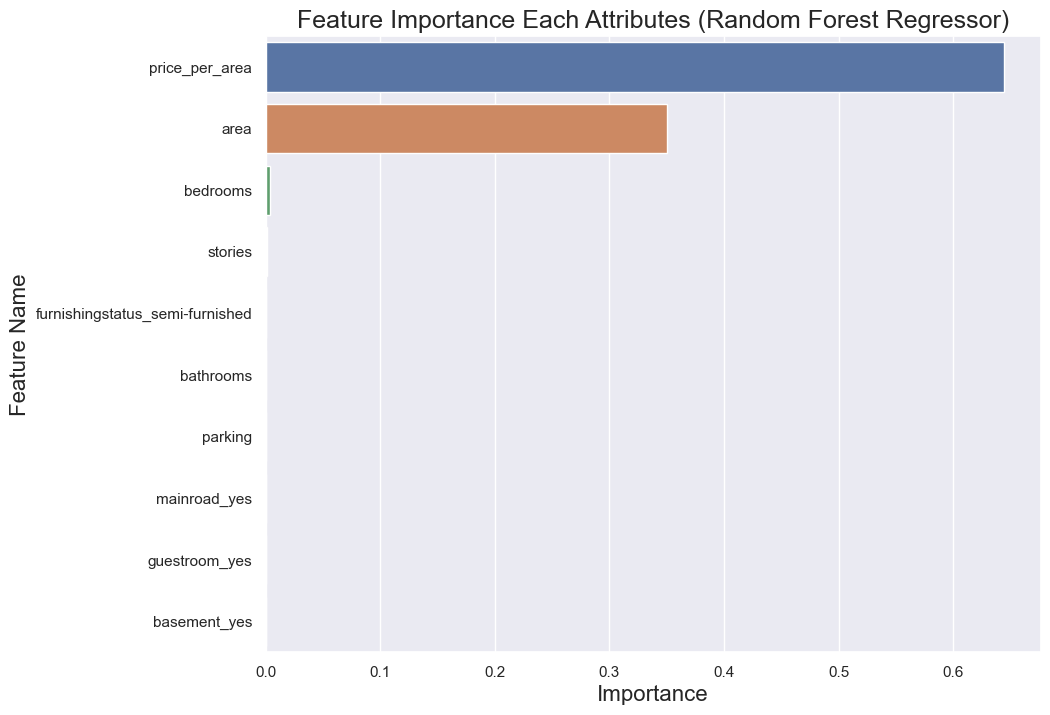

In [428]:
imp_df=pd.DataFrame({"Feature Name":X_train.columns,"Importance":dt.feature_importances_})
fi =imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)
plt.show()


# Random Forest Regression

In [419]:
# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 2642917147439.177
Root Mean Squared Error (RMSE): 1625705.1231509289
R-squared (R2): 0.3862802942563528


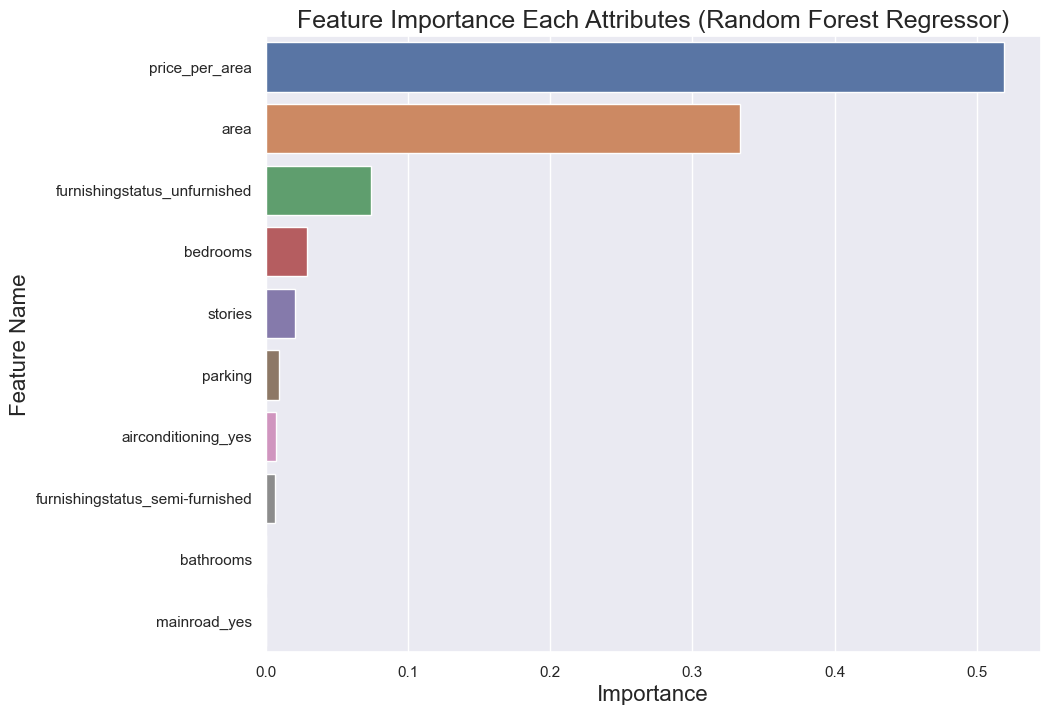

In [452]:
imp_df=pd.DataFrame({"Feature Name":X_train.columns,"Importance":rf_model.feature_importances_})
fi =imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)
plt.show()

# Gradient Boosting Regression

In [420]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, gb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, gb_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 2148396220921.9878
Root Mean Squared Error (RMSE): 1465740.8437107794
R-squared (R2): 0.5011144795808058


# XGBoost Regression

In [421]:
# XGBoost Regression
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2734681124694.705
Root Mean Squared Error (RMSE): 1653687.1302319267
R-squared (R2): 0.3649715062855693


In [425]:
# Base models
linear_model = LinearRegression()
dt_model = DecisionTreeRegressor()

# Set parameters for base models
linear_model.set_params(normalize=True)
dt_model.set_params(max_depth=5)

# AdaBoost ensemble
boosted_model = AdaBoostRegressor(base_estimator=linear_model)

# Fit the ensemble model to the training data
boosted_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = boosted_model.predict(X_test)

# Evaluate the ensemble model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 770838149150.6803
Root Mean Squared Error (RMSE): 877973.8886497025
R-squared (R2): 0.8210013649004786
